<a href="https://colab.research.google.com/github/EyalKoubi/CloudProject/blob/main/BegginingOfGameNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

[Errno 2] No such file or directory: '/content/drive/MyDrive'
/content


In [1]:
!pip install firebase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import ipywidgets as widgets
from IPython.display import display

from firebase import firebase

import time

# Initialize the Firebase connection
FBconn = firebase.FirebaseApplication('https://new-proj-917e8-default-rtdb.firebaseio.com/', None)

def createWelcomeScreen():
    # Create main title widget
    title_widget = widgets.HTML("<h1>Welcome to the Python Game</h1>")
    title_widget.add_class("main-title")

    # Create second title widget
    subtitle_widget = widgets.HTML("<h2>It's like Squid Game but here you stay alive :)</h2>")
    subtitle_widget.add_class("subtitle")

    def handle_manager_button_click(b):
        screen_container.close()
        display(createPopup())

    def handle_player_button_click(b):
        screen_container.close()
        display(createGameScreen())

    # Create manager button widget
    manager_button = widgets.Button(description="Manager")
    manager_button.add_class("button-manager")
    manager_button.on_click(handle_manager_button_click)

    # Create player button widget
    player_button = widgets.Button(description="Player")
    player_button.add_class("button-player")
    player_button.on_click(handle_player_button_click)

    # Create button container widget
    button_container = widgets.VBox([manager_button, player_button])
    button_container.add_class("button-container")

    # Create screen container widget
    screen_container = widgets.VBox([title_widget, subtitle_widget, button_container])
    screen_container.add_class("screen-container")

    return screen_container

def createPopup():
    overlay = widgets.Output(layout={'border': '1px solid black', 'background-color': 'rgba(0, 0, 0, 0.5)', 'padding': '20px'})
    overlay.add_class("popup-overlay")

    def handle_exit_button_click(b):
        overlay.close()
        display(createWelcomeScreen())

    def handle_submit_button_click(b):
        choice = password_input.value
        if choice != "shablool":
            error_label.value = "The choice is incorrect, please try again"
        else:
            overlay.close()
            display(createManagerScreen())

    with overlay:
        exit_button = widgets.Button(description="X", button_style="danger")
        exit_button.add_class("exit-button")
        exit_button.on_click(handle_exit_button_click)

        password_input = widgets.Password(placeholder="Enter password")
        password_input.add_class("password-input")

        error_label = widgets.HTML(value="", layout={'color': 'red'})
        error_label.add_class("error-label")

        submit_button = widgets.Button(description="Submit")
        submit_button.add_class("submit-button")
        submit_button.on_click(handle_submit_button_click)

        content = widgets.VBox([widgets.HBox([exit_button], layout={'justify_content': 'flex-end'}),
                               password_input, error_label, submit_button])
        content.add_class("popup-content")

        display(content)

    return overlay

overlay = None

def handle_exit_button_click(b):
  overlay.close()
  display(createManagerScreen())

def handle_add_quiz_button_click(b):
    overlay.clear_output()  # Clear the output instead of closing it
    createAddQuiz(handle_exit_button_click)  # Pass the exit callback

def handle_remove_quiz_button_click(b):
    overlay.clear_output()  # Clear the output instead of closing it
    createRemoveQuiz()  # Display the remove quiz screen

def createAddQuiz(exit_callback):
    global overlay  # Declare overlay as a global variable

    def handle_exit_button_click_to_manager(b):
      form.close()
      overlay.close()
      display(createManagerScreen())

    form = widgets.VBox()

    exit_div = widgets.VBox(layout={'display': 'flex', 'justify_content': 'flex-end'})
    exit_button = widgets.Button(description="X")
    exit_button.button_style = "danger"
    exit_button.on_click(handle_exit_button_click_to_manager)
    exit_div.children = [exit_button]
    form.children = [exit_div]

    question_input = widgets.Text(placeholder="Question")
    option1_input = widgets.Text(placeholder="Option 1")
    option2_input = widgets.Text(placeholder="Option 2")
    option3_input = widgets.Text(placeholder="Option 3")
    option4_input = widgets.Text(placeholder="Option 4")
    correct_input = widgets.Dropdown(options=["Option 1", "Option 2", "Option 3", "Option 4"])
    submit_button = widgets.Button(description="Submit")
    error_label = widgets.HTML(value="One of the fields is empty.", layout={'display': 'none', 'color': 'red'})
    success_label = widgets.HTML(value="The quiz added successfully!", layout={'display': 'none', 'color': 'green'})
    form.children += (question_input, option1_input, option2_input, option3_input, option4_input, correct_input,
                      submit_button, error_label, success_label)

    def handle_submit_button_click(b):
        question = question_input.value
        option1 = option1_input.value
        option2 = option2_input.value
        option3 = option3_input.value
        option4 = option4_input.value
        options = [option1, option2, option3, option4]
        correct = int(correct_input.value.split(" ")[1])

        if not question or not option1 or not option2 or not option3 or not option4 or not correct:
            error_label.layout.display = 'block'
            success_label.layout.display = 'none'
        else:
            # Check if the question already exists
            existing_questions = FBconn.get('/Questions', None)  # Assuming 'questions' is the path to the question data in your Firebase database

            if existing_questions:
                existing_questions = existing_questions.values()
                if any(q['question'] == question for q in existing_questions):
                    error_label.value = "The question already exists."
                    error_label.layout.display = 'block'
                    success_label.layout.display = 'none'
                    return

            # Add the quiz to the database
            data = {
                'question': question,
                'options': options,
                'correctOption': options[correct-1]
            }
            result = FBconn.post('/Questions', data)  # Assuming 'questions' is the path to the question data in your Firebase database

            if result:
                error_label.layout.display = 'none'
                success_label.layout.display = 'block'
                question_input.value = ""
                option1_input.value = ""
                option2_input.value = ""
                option3_input.value = ""
                option4_input.value = ""
            else:
                error_label.value = "Failed to add the quiz to the database. Please try again."



    submit_button.on_click(handle_submit_button_click)

    overlay.close()
    display(form)

def createRemoveQuiz():
    def removeQuestion(questionId):
        FBconn.delete(f'/Questions/{questionId}', None)
        question_element = next(
            (c for c in remove_quiz_container.children if c.question_id == questionId), None
        )
        if question_element:
            remove_quiz_container.children = tuple(
                c for c in remove_quiz_container.children if c != question_element
            )

    def handle_exit_button_click_to_manager(b):
        remove_quiz_container.close()
        exit_button.close()
        overlay.close()
        display(createManagerScreen())

    remove_quiz_container = widgets.VBox()
    question_containers = []

    questions = FBconn.get('/Questions', None)
    if questions:
        for question_id, question_data in questions.items():
            question_container = widgets.HBox()
            question_text = widgets.HTML(f"<p>{question_data['question']}</p>")
            remove_button = widgets.Button(description="X", button_style="danger")
            remove_button.on_click(lambda b, q_id=question_id: removeQuestion(q_id))
            question_container.children = [question_text, remove_button]
            question_container.question_id = question_id
            question_containers.append(question_container)

    exit_button = widgets.Button(description="Exit", button_style="danger")
    exit_button.on_click(handle_exit_button_click_to_manager)
    remove_quiz_container.children = question_containers + [exit_button]

    overlay.close()
    display(remove_quiz_container)


def createManagerScreen():
    global overlay  # Declare overlay as a global variable

    # Create the overlay widget
    overlay = widgets.Output(layout={'border': '1px solid black', 'background-color': 'rgba(0, 0, 0, 0.5)', 'padding': '20px'})



    with overlay:
        def handle_exit_button_click_to_popup(b):
          overlay.close()
          display(createPopup())

        # Create the manager screen widget
        manager_screen = widgets.VBox()

        # Create the exit button
        exit_button = widgets.Button(description="X")
        exit_button.button_style = "danger"
        exit_button.on_click(handle_exit_button_click_to_popup)

        # Create the manager title
        manager_title = widgets.HTML("<h1>Manager Screen</h1>")

        # Create the add quiz button
        add_quiz_button = widgets.Button(description="Add Quiz")
        add_quiz_button.on_click(handle_add_quiz_button_click)
        add_quiz_button.style.button_color = "lightblue"

        # Create the remove quiz button
        remove_quiz_button = widgets.Button(description="Remove Quiz")
        remove_quiz_button.on_click(handle_remove_quiz_button_click)
        remove_quiz_button.style.button_color = "lightblue"

        # Arrange the widgets
        manager_screen.children = [exit_button, manager_title, add_quiz_button, remove_quiz_button]
        manager_screen.layout = {'border': '1px solid black', 'padding': '10px', 'margin': '10px'}

        # Display the manager screen widget
        display(manager_screen)

    return overlay

screen_container = createWelcomeScreen()
display(screen_container)


Output(layout=Layout(border='1px solid black', padding='20px'), _dom_classes=('popup-overlay',))

Output(layout=Layout(border='1px solid black', padding='20px'))

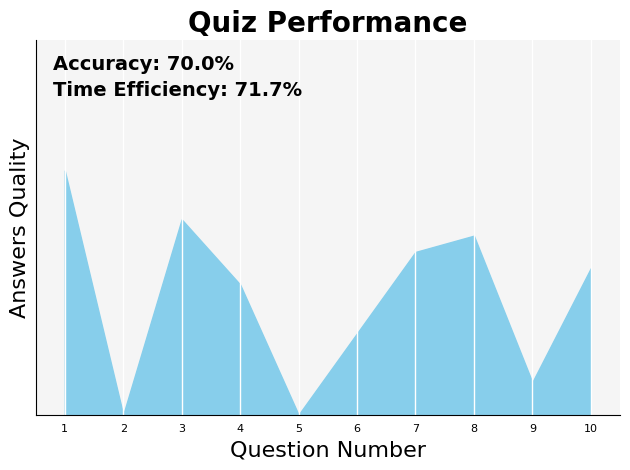

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def create_quiz_graph(right_answers, response_times, total_time):
    # Calculate the percentage of right answers
    percentage_right = (right_answers / len(response_times)) * 100

    # Calculate the percentage of time spent
    percentage_time = (np.sum(response_times) / total_time) * 100

    # Create a list of question numbers
    questions = np.arange(1, len(response_times) + 1)

    # Set the colors for correct and incorrect answers
    colors = ['red' if time == -1 else 'limegreen' for time in response_times]

    # Set the y-values for the area graph based on response times
    y_values = np.array(response_times)
    y_values[y_values != -1] = max(response_times) + 2
    y_values = y_values - response_times

    # Plot the area graph
    plt.fill_between(questions, y_values, color='skyblue')

    # Remove the ticks and tick labels on the y-axis
    plt.yticks([])

    # Set the background color of the graph
    plt.gca().set_facecolor('#f5f5f5')

    # Set the title and labels
    plt.title('Quiz Performance', fontsize=20, fontweight='bold')
    plt.xlabel('Question Number', fontsize=16)
    plt.ylabel('Answers Quality', fontsize=16)

    # Add text to show the performance percentages
    plt.text(0.03, 0.92, f"Accuracy: {percentage_right:.1f}%", transform=plt.gca().transAxes, fontsize=14, fontweight='bold', color='black')
    plt.text(0.03, 0.85, f"Time Efficiency: {percentage_time:.1f}%", transform=plt.gca().transAxes, fontsize=14, fontweight='bold', color='black')

    # Add the question numbers as indexes at the bottom of the screen
    plt.xticks(questions, questions, fontsize=8)
    plt.gca().tick_params(axis='x', bottom=False)

    # Set the grid
    plt.grid(color='white', linestyle='-', linewidth=1)

    # Remove the top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Set the limits of the x-axis and y-axis
    plt.xlim(0.5, len(response_times) + 0.5)
    plt.ylim(0, max(response_times) + 5)

    # Show the plot
    plt.tight_layout()
    plt.show()

right_answers = 7
response_times = [5, -1, 8, 12, -1, 15, 10, 9, 18, 11]
total_time = 120

create_quiz_graph(right_answers, response_times, total_time)
